# Tutorial 2b: Exploratory data analysis

(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from an Jupyter notebook.  You can download the notebook [here](t2b_exploratory_data_analysis.ipynb).*

Loading BokehJS ...


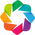

In [1]:
import numpy as np
import pandas as pd

import bokeh.io
import bokeh.plotting

import holoviews as hv

import bebi103

bokeh.io.output_notebook()
hv.extension('bokeh')

In 1977, John Tukey, one of the great statisticians and mathematicians of all time, published a book entitled *Exploratory Data Analysis*. In it, he laid out general principles on how researchers should handle their first encounters with their data, before formal statistical inference. Most of us spend a lot of time doing exploratory data analysis, or EDA, without really knowing it. Mostly, EDA involves a graphical exploration of a data set. In this tutorial, we will learn how to efficiently explore data.

We start off with a few wise words from John Tukey himself.

## Useful EDA advice from John Tukey

- "Exploratory data analysis can never be the whole story, but nothing else can serve as a foundation stone—as the first step."

<br/>

- "In exploratory data analysis there can be no substitute for flexibility; for adapting what is calculated—and what we hope plotted—both to the needs of the situation and the clues that the data have already provided."

<br />

- "There is no excuse for failing to plot and look."

<br />

- "There is often no substitute for the detective's microscope - - or for the enlarging graphs."

<br />

- "Graphs force us to note the unexpected; nothing could be more important."

<br />

- "'Exploratory data analysis' is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there."

## Introduction to HoloViews

So far, we have used Bokeh to generate plots. I hope you now have an appreciation for its utility. However, Bokeh is a low-level plotting library. That is, it specializes in making figures and then placing glyphs, like circles and lines, onto the figure. By contrast, a high-level plotting library might take a data frame, and then automatically generate scatter plots with the axes labeled with column headings of the data frame. This allows for more rapid exploration of data.

[HoloViews](http://holoviews.org/) is an excellent high-level plotting library, and we will be using it in this course. This tutorial will be useful to use HoloViews, but you really don't need it. HoloView's documentation is extensive, intuitive, and well-organized. You should refer to it. You should still read this tutorial, though, since it's not just about HoloViews, but EDA in general.

We will start playing with HoloViews using the data set of frog strikes from the previous tutorial. As a brief reminder, the data set comes from Kleinteich and Gorb, *Sci. Rep.*, **4**, 5225, 2014. The authors measured various physical properties tongues of horned frogs hitting a target connected to a force transducer. Let's load in that data set so we have it available.

In [2]:
df = pd.read_csv('../data/frog_tongue_adhesion.csv', comment='#')

# Populate metadata
data_dict = {'ID': ['I', 'II', 'III', 'IV'],
             'age': ['adult', 'adult', 'juvenile', 'juvenile'],
             'SVL (mm)': [63, 70, 28, 31],
             'weight (g)': [63.1, 72.7, 12.7, 12.7],
             'species': ['cross', 'cross', 'cranwelli', 'cranwelli']}
df_frog_info = pd.DataFrame(data=data_dict)
df = df.merge(df_frog_info)

# Take a quick look at the data frame
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa),SVL (mm),age,species,weight (g)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030,63,adult,cross,63.1
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695,63,adult,cross,63.1
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239,63,adult,cross,63.1
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381,63,adult,cross,63.1
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975,63,adult,cross,63.1


### Our first HoloViews plot

Ok, now that that is loaded, let's try to make a plot of the impact force versus adhesive force like we did before. This time, we will use HoloViews. Note that we have already imported HoloViews as `hv` and have run `hv.extension('bokeh')` to indicate that we want HoloViews to render the plots using Bokeh. (You can also use [Matplotlib](http://matplotlib.org/) or [Plotly](http://plot.ly/), and probably also others in the future.)

In [3]:
hv.Scatter(df, kdims=['impact force (mN)'], vdims=['adhesive force (mN)'])

:Scatter   [impact force (mN)]   (adhesive force (mN))

As you can see, generation of the plot was much more concise. Let's parse this. We instantiated a HoloViews **`Element`**, in this case a `Scatter` element, using `hv.Scatter`. You can think of an element as a graphical object, a plot that is populated with glyphs. After we create this, because we are in a Jupyter notebook, the element is automatically displayed as if we called `bokeh.io.show()`.

The first argument is the `DataFrame` itself. This is the **data** for the element. A data frame by itself is insufficient to generate a plot. The data frame needs to be **annotated**. Specifically, we need to annotate which columns are **key dimensions** and which columns are **value dimensions**. To understand what these mean, it's easiest to quote the HoloViews documentation, "The key dimensions are the dimensions you can index by to get the values corresponding to the value dimensions." So, in the case of a scatter plot, there is a single key dimension, which represents the independent variable, or x-axis, and a single value dimension, which represents the dependent variable, or y-axis.

This is the main idea behind HoloViews: annotate your tidy data frame (with `kdims` and `vdims`), and let HoloViews generate the plot for you. In fact, their motto is "Stop plotting your data—annotate your data and let it visualize itself."

### Styling our plot

The default style of this scatter plot is not the default Bokeh style, which I prefer. We might also want to specify the plot dimensions and other attributes about the plot. In HoloViews, you can specify **style options** and **plot options**.

- **style options**: These are options used by the renderer (in our case Bokeh). These are things like coloring of glyphs.
- **plot options**: These control how HoloViews builds the graphic. These are things like whether or not to display a title or show a grid.

We can specify these options as a dictionary and then pass them as arguments to the `opts()` method of an element. Let's see how this works for our scatter plot.

In [4]:
# Specify styles
plot_opts = {'show_grid':  True,
             'width': 450,
             'height': 350}
style_opts = {'color': '#1f77b4',
              'size': 5}

# Create element; important to store it
scatter = hv.Scatter(df, kdims=['impact force (mN)'], vdims=['adhesive force (mN)'])

# Display with styling options
scatter.opts(style=style_opts, plot=plot_opts)

:Scatter   [impact force (mN)]   (adhesive force (mN))

This is nicer, but there is an even simpler way to style the plot with **IPython magic functions**. Magic functions are not Python, but a instructions that IPython can read (and therefore make active in a Jupyter notebook). We have see an example of a magic function with the `%timeit` magic in a previous tutorial. The magic functions between with either a single percent sign (`%`) or a double percent sign (`%%`). In HoloViews, use of a single percent sign makes the magic function apply to the entire Jupyter notebook, and use of a double magic sign make the magic function apply only to the code cell in which it resides. Let's style our plot using magic functions.

In [5]:
%%opts Scatter [show_grid=True, width=450, height=350] (color='#1f77b4', size=5)

hv.Scatter(df, kdims=['impact force (mN)'], vdims=['adhesive force (mN)'])

:Scatter   [impact force (mN)]   (adhesive force (mN))

Using the `%%opts` magic function allowed us to style the plot for the cell above. Note the syntax. First, after the `%%opts` command, is the name of the class of element we are styling. So, all scatter plots made in the cell will have the styling applied. In brackets are plot options. These are written in kwarg style, separated by commas. In parentheses are style options, also written in kwarg style.

If we wanted this styling to be in effect for the entire notebook, we can place the `%opts` magic function (with a single percent sign) at the top of the document, and then all scatter plots would be in that style.

### Changing axis labels

As it stands, the axis labels are the column headings of the `DataFrame`. But what if the column headings are not good to use as labels? To demonstrate, I will mess up the adhesive force and impact force column names, calling them respectively `adhf` and `impf`.

In [6]:
df_short_name = df.rename(columns={'impact force (mN)': 'impf',
                                   'adhesive force (mN)': 'adhf'})

Now, let's make a plot.

In [7]:
%%opts Scatter [show_grid=True, width=450, height=350] (color='#1f77b4', size=5)

scatter = hv.Scatter(df_short_name, kdims=['impf'], vdims=['adhf'])
scatter

:Scatter   [impf]   (adhf)

To change this, we can use the `redim` method of the `Scatter` element.

In [8]:
scatter = scatter.redim.label(impf='impact force (mN)',
                              adhf='adhesive force (mN)')
scatter

:Scatter   [impf]   (adhf)

Note also that the styling we assigned when we made the element `scatter` still hold. Alternatively to using `redim`, we can specify the dimensions as lists of 2-tuples. The first entry is the column in the inputted `DataFrame`, and the second is the label.

In [9]:
%%opts Scatter [show_grid=True, width=450, height=350] (color='#1f77b4', size=5)

scatter = hv.Scatter(df_short_name,
                     kdims=[('impf', 'impact force (mN)')], 
                     vdims=[('adhf', 'adhesive force (mN)')])

scatter

:Scatter   [impf]   (adhf)

### Fixing the data ranges and the bebi103 module

One annoying feature about scatter plots generated by HoloViews is that the range of the axes *exactly* matches that of the data. This means that some glyph get cut off by the edge of the plot. HoloViews does have a way to set that (via `redim.soft_range()`), but it can be a pain to do that over and over again.

Therefore, I wrote a function to automatically redimension the ranges of the axes to give a 5% buffer around the data points, ensuring that no glyphs (at least no reasonably sized glyphs) are cut off. The function to do that is included in the `bebi103` module. This is a module containing lots of useful functions to use throughout this course. To install it, do

    pip install bebi103
    
on the command line. You can then import and use the module. I will be updating it throughout the term, so when there are updates, you can do the following to make sure you have the most recent version.

    pip install --upgrade bebi103

Now, we can use the `bebi103.viz.adjust_range()` function to fix the glyph chopping problem.

In [10]:
scatter = bebi103.viz.adjust_range(scatter)
scatter

:Scatter   [impf]   (adhf)

## Split-apply-combine with graphic elements

Remember that when using HoloViews, we're annotating a `DataFrame` to identify which are key dimensions and which are value dimensions. It makes sense, then, that if we have a tidy `DataFrame` and can do split-apply-combine to it, so too can we do with HoloViews elements.

To demonstrate how this works, let's first make a scatter plot, except specifying an additional value dimension, `'age'`. You will recall that the `'age'` column specifies whether the frog is a juvenile or an adult. Note that we have not included the `color` plot option, since we will be coloring glyphs in different ways in a moment.

In [11]:
%%opts Scatter [show_grid=True, width=450, height=350] (size=5)

scatter = hv.Scatter(df,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)', 'age'])

scatter = bebi103.viz.adjust_range(scatter)

scatter

:Scatter   [impact force (mN)]   (adhesive force (mN),age)

This looks exactly like our previous plot. HoloViews can only use one value dimension to place the glyphs, so it chose the first one listed by default. We have not yet told it what to do with the other value dimension. For example, we could use it to set the color or size or even shape of the glyph.

What we really want to do, though, is split-apply-combine. So, we will use a `groupby()` method on the scatter plot. Let's see what that does.

*A quick note before we do: As of HoloViews version 1.8.3, some of the functionality of HoloMap objects does not work with Bokeh 0.12.9. You should be sure you have Bokeh 0.12.7 installed. Otherwise, you will get an error.*

In [12]:
%%opts Scatter [show_grid=True, width=450, height=350] (size=5)

# Make groupby object
gb = scatter.groupby('age')

# Take a look
gb

:HoloMap   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age)

Whoa! It automatically gave us pulldown menu for age. (*This pulldown menu requires Python to be running and will not be active in the static HTML version of this notebook. To get full interactivity, you need to run the Jupyter notebook.*) Here, Holoviews automatically deduced that the "apply" operation was to make a pulldown menu allowing us to choose between adult and juvenile. The results was combined into a new graphic.

Let's take a quick look at what the `groupby()` operation on the `scatter` object created.

In [13]:
type(gb)

holoviews.core.spaces.HoloMap

This is a HoloMap, which is a **container** of graphics elements. A HoloMap is structured like a dictionary, which the pulldow menu being the keys, and the graphics being the items. So, you select the keys in the pulldown menu to see the corresponding graphic.

We can convert the HoloMap to other kinds of containers. For example, we may wish to **overlay** the scatter plots for adults and juveniles. We can accomplish this using the `overlay()` method.

In [14]:
overlay = gb.overlay()

# Take a look 
overlay

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age)

When we chose to make an overlay, HoloViews automatically deduced that the "apply" operation was to color the glyphs. It then "combined" the plots into an overlay. Specifically, this is an `NdOverlay` instance. (*Want to see something cool? Click on the dots in the legend.*)

In [15]:
type(overlay)

holoviews.core.overlay.NdOverlay

Instead, it can make subplots with a layout.

In [16]:
layout = gb.layout()

# Take a look
layout

:NdLayout   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age)

Here, the "apply" operation was to make subplots, and the "combine" operation was to make a figure with the two subplots. If you pan on the interactive plots, you will see that the axes are also linked. Here, the contaier is an `NdLayout`.

In [17]:
type(layout)

holoviews.core.layout.NdLayout

## Exploring your data with hover tools

Let's say we want to make the above overlay plot, with juveniles in red and adults in blue. But we may also be interested in knowing some metadata about each measurement, say the ID of the frog and on which date the experiments were performed. We can get that information by including the `'ID'` and `'date'` columns as variable dimensions, and also specifying that we want to use a hover tool in the plot, but specifying we want to use `'hover'` in the plot options.

In [18]:
%%opts Scatter [show_grid=True, width=450, height=350, tools=['hover']] (size=5)

scatter = hv.Scatter(df,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)', 'age',  'ID', 'date'])

scatter = bebi103.viz.adjust_range(scatter)

# Make groupby object
gb = scatter.groupby('age')

# Make the overlay
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age,ID,date)

This can be very convenient for exploring data. However, I think there is too much information being displayed here for my taste, so I want to specify exactly what I want when I hover, just the frog ID and the date. We can do that by explicitly specifying the hover tool using Bokeh directly (documentation on how to do that [here](https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool)).

In [19]:
%%opts Scatter [show_grid=True, width=450, height=350] (size=5)
%%opts Scatter [tools=[bokeh.models.HoverTool(tooltips=[('ID', '@ID'), ('date', '@date')])]]

scatter = hv.Scatter(df,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)', 'age',  'ID', 'date'])

scatter = bebi103.viz.adjust_range(scatter)

# Make groupby object
gb = scatter.groupby('age')

# Make the overlay
overlay = gb.overlay()

# Display
overlay

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age,ID,date)

## Quick composition

Let's still consider this scatter plot. Saw we perform a linear regression to get a relationship between adhesive force and impact force. We will go into regressions in much more depth in coming weeks, but for now, I'll do a quick-and-dirty calculation of the slope and intercept.


In [20]:
# Quick-and-dirty linear regression
slope, intercept = np.polyfit(df['impact force (mN)'], df['adhesive force (mN)'], 1)

# Make a line for plotting
impf = np.array([0, 3000])
adhf = slope * impf + intercept

Now let's say we with to also have the line from the regression on the same plot. We can add this to the plot by using the `*` operator, which implies overlay.

In [21]:
%%opts Scatter [tools=[bokeh.models.HoverTool(tooltips=[('ID', '@ID'), ('date', '@date')])]]
%%opts Curve (line_width=2, color='#24406d')

# Make the regression line; pass tuple with x, y values.
regression_line = hv.Curve((impf, adhf),
                           kdims=['impact force (mN)'],
                           vdims=['adhesive force (mN)'])

# Compose a new plot with an overlay
regression_line * overlay

:Overlay
   .Curve.I     :Curve   [impact force (mN)]   (adhesive force (mN))
   .NdOverlay.I :NdOverlay   [age]
      :Scatter   [impact force (mN)]   (adhesive force (mN),age,ID,date)

Conversely, if I wanted to, I could "add" the elements to get a `Layout` instead of an `Overlay`.

In [22]:
%%opts Scatter [tools=[bokeh.models.HoverTool(tooltips=[('ID', '@ID'), ('date', '@date')])]]

regression_line + overlay

:Layout
   .Curve.I     :Curve   [impact force (mN)]   (adhesive force (mN))
   .NdOverlay.I :NdOverlay   [age]
      :Scatter   [impact force (mN)]   (adhesive force (mN),age,ID,date)

This is obviously not what we would want to do, but it serves to demonstrate two points. First, when we composed the overlay (with the `*` operator), the style properties of the `NdOverlay` scatter plot were respected, and not when we did the `Layout` (with the `+` operator). Secondly, we showed that we can mix compositions in a layout. Here, we have a `Curve` and an `NdOverlay` on a layout together. 

## Coloring and sizing points

How much information can be pack into a single scatter plot? In addition to coloring the points, we can also control their size. Let's say we wanted to plot adhesive force versus impact force and size the dots according to the time the frog pulls on the target. We can accomplish this using the `size_index` plot option. It specifies that the absolute value of entries in the column of the `DataFrame` specified by `size_index` determine the size of the glyph on the scatter plot, in units of pixels. You also have to specify a `scaling_factor` plot option, which is a multiplier necessary to get sane sizes (e.g., we do not want a glyph with diameter 500 pixels, but 5 pixels is preferred, so we use `scaling_factor=0.01`).

In [23]:
%%opts Scatter (size=5)
%%opts Scatter [show_grid=True, width=450, height=350]
%%opts Scatter [size_index='total contact area (mm2)', scaling_factor=0.01]

# Creat scatter plot with specified options
scatter = hv.Scatter(df,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)',
                            'age',
                            'total contact area (mm2)',
                            'ID',
                            'date'])

scatter = bebi103.viz.adjust_range(scatter)

# Make overlay and display
scatter.groupby('age').overlay()

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age,total contact area (mm2),ID,date)

The contact area tends to be a bit bigger for adults, probably because they have bigger tongues. While you can make plots like this, I do urge caution in doing so. You do not want to overload the amount of information you are displaying in a single plot. A single plot should be easy to read and quickly digest what is going on. If you need to look at more aspects of a data set rapidly, I recommend, for example, a grid matrix, which follows.

## Grid matrices

Say we wanted to take a quick look at scatter plots between pairs of a bunch of variables of interest. We could do the whole `DataFrame`, but for this analysis, we will do size entries. We would like to lay out a 6×6 grid of scatter plots of each variable versus each other. To do this, HoloViews needs an already-annotated data set. So far, when we have built a graphic, we have annotated a `DataFrame` with kwargs in the instantiation of a HoloView element. But in this case, we need to have the data set already annotated. We can do that by instantiating an `hv.Dataset`.

In [24]:
# Which key dimensions we want (with shortened labels to avoid clutter in plots)
kdims = [('impact force (mN)', 'imp force'),
         ('impact time (ms)', 'imp time'),
         ('adhesive force (mN)', 'adh force'),
         ('time frog pulls on target (ms)', 'time pull'),
         ('total contact area (mm2)', 'area'),
         ('contact pressure (Pa)', 'pressure')]

# We will again group by age
vdims = ['age']

# Creat a HoloViews Dataset
ds = hv.Dataset(df, kdims=kdims, vdims=vdims)

Now that we have the annotated data set, we can perform a `groupby()` operation on it. When we do it, we need to specify the container type. In other words, do we want a `HoloMap`, an `NdOverlay`, an `NdLayout`? In this case, we will choose an `NdOverlay`, since we want the juveniles plotted in red and the adults in blue, as before.

In [25]:
gb = ds.groupby('age', container_type=hv.NdOverlay)

Now that we have the groupby object, we can use `hv.operation.gridmatrix()` to make a matrix of our plots. We will choose to populate the diagonals with scatter plots (it's histograms by default).

In [26]:
hv.operation.gridmatrix(gb, diagonal_type=hv.Scatter)

:GridMatrix   [X,Y]
   :NdOverlay   [age]
      :Scatter   [total contact area (mm2)]   (total contact area (mm2))

This gives a rapid way to explore relationships among pairs of variables.

## Asking HoloViews for help

HoloViews has extensive help capabilities, aside from having [excellent documentation](http://holoviews.org/). If you have created an element or composition, you can ask about it. It will tell you what parameters are available to set and what the parameters you chose are. You can ask for help using the `hv.help()` function. Let's ask about `overlay`, which was a graphic containing a scatter plot of adhesive force versus impact force, color coded by the age of the frogs.

In [27]:
hv.help(overlay)

NdOverlay: NdOverlay 

Online example: http://holoviews.org/reference/containers/bokeh/NdOverlay.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Scatter.Scatter

Container: NdOverlay.NdOverlay

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	alpha, click_policy, color, glyph_height, glyph_width, hover_alpha, hover_color, hover_line_alpha, hover_line_color, label_height, label_standoff, label_width, legend_padding, legend_spacing, line_alpha, line_cap, line_color, line_dash, line_join, line_width, muted_alpha, muted_color, muted_line_alpha, muted_line_color, nonselection_alpha, nonselection_color, nonselection_line_alpha, nonselection_line_color, selection_alpha, selection_color, selection_line_alpha, selection_line_color, text_align, text_alpha, text_baseline, text

This can be very handy, for example, for picking out what stylings you might want to try.

## Exporting from HoloViews

You often want to save your plot to disk so you can share it with colleagues or use it in a publication. You can output any HoloViews plot that you create in a code cell of a Jupyter notebook using the `%%output` magic function. For example, to export out scatter plot of adhesive forces versus impact forces, we would do the following to save it to an interactive HTML.

In [28]:
%%opts Scatter [tools=[bokeh.models.HoverTool(tooltips=[('ID', '@ID'), ('date', '@date')])]]
%%output filename='adhf_vs_impf' fig='html'

overlay

:NdOverlay   [age]
   :Scatter   [impact force (mN)]   (adhesive force (mN),age,ID,date)

In addition to displaying the plot in the notebook, the plot is converted to HTML and saved as `adhf_vs_impf.html`. If we want to convert to SVG, we do the same thing, except we use `fig='svg'`.

Note, however, that when we export it this way, we lose the hovering capability in the outputted HTML. (My guess is that this will be fixed in a future version of HoloViews, though.) So, we might want to export the plot to get a Bokeh plot that we can then export. Beyond that, we may wish to use HoloViews to create a plot, but then use Bokeh's lower-level capabilities to edit it.

This functionality is not yet completely functional (or at least not completely transparent) in HoloViews for overlays, so I will demonstrate it with a workaround using `color_index`, which works in much the same way as `size_index` we have already encountered. We also need to specify a `cmap`, or colormap, style option to specify how the glyphs are colored. And valid string specifying [a Matplotlib colormap](https://matplotlib.org/users/colormaps.html) will do. The glyphs are then colored sequentially according to the colormap. So, you are limited in the specification (unless you want to get into the guts of specifying colormaps), but there are some nice options. I like `'Dark2'` for two colors.

We cannot use the magic `%%opts` function because the options there are invoked when HoloViews renders the graphic in the notebook. So, we need to use the `.opts()` method of the `Scatter` instance to set the options. Once the plot is made, we can pull out the Bokeh figure by using `hv.renderer('bokeh')` to get an HoloViews renderer, which has a `get_plot()` method to extract the plot. Finally, the `state` attribute is the Bokeh plotting object itself.

In [29]:
# Set up the styling dictionaries
style_opts = dict(size=5, cmap='Dark2')
plot_opts = dict(show_grid=True,
                 width=450,
                 height=350,
                 color_index='age',
                 tools=[bokeh.models.HoverTool(tooltips=[('ID', '@ID'), ('date', '@date')])])

# Create scatter plot with specified options
scatter = ( hv.Scatter(df,
                     kdims=['impact force (mN)'], 
                     vdims=['adhesive force (mN)', 'age',  'ID', 'date'])
               .opts(style=style_opts, plot=plot_opts))

scatter = bebi103.viz.adjust_range(scatter)

# Pull out a Bokeh figure
p = hv.renderer('bokeh').get_plot(scatter).state

We now have a Bokeh figure that we can use, save, and edit, complete with hover capabilities.

In [30]:
bokeh.io.show(p)

We can also export this plot to HTML, complete with hovering capabilities. (We will get the usual warnings that we got in last week's tutorials, but it will still render the HTML.)

In [31]:
bokeh.io.save(p, 'ashf_vs_impf_with_hover.html')

/Users/Justin/anaconda/lib/python3.6/site-packages/bokeh/io.py:527: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warnings.warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/Justin/anaconda/lib/python3.6/site-packages/bokeh/io.py:537: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warnings.warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/Justin/git/bebi103_course/2017/tutorials/ashf_vs_impf_with_hover.html'

## Display of repeated measurments

Thus far, we have focused on scatter plots to highlight how you can use HoloViews to rapidly explore your data sets. For the rest of this tutorial, we will focus on good practices for displaying a data type commonly encountered in biology. We repeat a measurement many times for given test conditions and wish to compare the results. The concrete example we will use will be the impact force of the frog strikes. The "conditions" are the IDs of the frogs. This would be completely analogous to, say, comparing the length of dorsal appendages of eggs from fruit flys of four different genotypes.

I will start with pretty much the worst, and probably most ubiquitous, mode of display: the bar graph. At least this exercise demonstrates that you can use `aggregate()` on a HoloViews plotting object, just like you could with `GroupBy` objects from `DataFrame`s.

In [32]:
bars = ( hv.Bars(df,
               kdims=[('ID', 'frog')],
               vdims=['impact force (mN)'])
            .aggregate(function=np.mean))

bars = bebi103.viz.adjust_range(bars)

bars

:Bars   [ID]   (impact force (mN))

This was of displaying data is just plain awful. You are only graphically showing the means and using a lot of real estate to do it. Why would you decide to only display four points when you actually measured 80 tongue strikes? This is the same thing as making this plot.

In [33]:
scatter = ( hv.Scatter(df,
                       kdims=[('ID', 'frog')],
                       vdims=['impact force (mN)'])
                .aggregate(function=np.mean)
                .opts(style=dict(size=5)))

scatter = bebi103.viz.adjust_range(scatter)

scatter

:Scatter   [ID]   (impact force (mN))

If you are going to summarize the data, a **box-and-whisker plot** is a better option. Indeed, it was invented by John Tukey himself. Instead of condensing your measurements into one value (or two, if you include an error bar) you condense them into at least five. Let's make a box plot to have something to look at while I describe them to you. We will use a utility for making them in the `bebi103` module. The first argument is a tidy `DataFrame`, the second is a string, or list of strings, used to split the data set. This is akin to a `kdim` in HoloViews. The last argument is the column that determines the values on the y-axis.

In [34]:
p = bebi103.viz.boxwhisker(df, 'ID', 'impact force (mN)')
bokeh.io.show(p)

The top of the box is the 75th **percentile** of the measured data. That means that 75 percent of the measurements were less than the top of the box. The bottom of the box is the 25th percentile. The line in the middle of the box is the 50th percentile, also called the **median**. Half of the measured quantities were less than the median, and half were above. The total height of the box encompasses the measurements between the 25th and 75th percentile, and is called the **interquartile region**, or IQR. The top whisker extends to the minimum of these two quantities: the largest measured data point and the 75th percentile plus 1.5 times the IQR. Similarly, the bottom whisker extends to the maximum of the smallest measured data point and the 25th percentile minus 1.5 times the IQR. Any data points not falling between the whiskers are then plotting individually, and are typically termed **outliers**, though there are many ways we could define what an outlier is (more on that later in the course).

So, box-and-whisker plots give much more information than a bar plot. They give a good summary of how data are distributed. I pause here to note that HoloViews does have the capabilities to make a box-and-whisker plot, but there is a bug in how the whiskers are set in HoloViews 1.8.3. This will be fixed in the next release, so I will show you how to make a box-and-whisker plot with HoloViews now.

In [35]:
%%opts BoxWhisker [width=450, height=300, show_grid=True, title_format='WRONG WHISKERS']

hv.BoxWhisker(df, kdims=['ID'], vdims=['impact force (mN)'])

:BoxWhisker   [ID]   (impact force (mN))

Note that **this is not right!** The whiskers are wrong.

Ok, we can make box-and-whisker plots, and we will be able to do it in the next release of HoloViews. But still, why not just plot all of the data? I am going to give you a general rule.

<div class="alert alert-info">
<center>**When you can, plot all of your data.**</center>
</div>

In a plot analogous to a box plot or bar plot, we can make a **jitter plot**. It is called in pretty much the same way that `bebi103.viz.boxwhisker()` was. (This is not yet implemented in HoloViews.)

In [36]:
p = bebi103.viz.jitter(df, 'ID', 'impact force (mN)')
bokeh.io.show(p)

As you can see, in a jitter plot, the x-axis is again a categorical variable, and the y-axis is continuous. For each category, every point is plotted with the precise y-value, and with the x-values randomly "jittered" a bit so we can see the data points.

This plot is more informative even than the box-and-whisker plot. We see that frog I strikes with a pretty broad distribution of impact forces. Frog II likes to strike at around 500 mN, but is capable of much bigger strikes around 1500 mN.

Sometimes, it is useful to still show the summaries present in the box-and-whisker plot, especially when there are lots of data points. We can construct an overlay by making the box-and-whisker plot and then adding circle glphys to it.

In [37]:
# Make box plot with gray boxes
p = bebi103.viz.boxwhisker(df, 'ID', 'impact force (mN)', palette='lightgray')

# Populate dots
p = bebi103.viz.jitter(df, 'ID', 'impact force (mN)', p=p)

bokeh.io.show(p)

### The ECDF

I return again to the ECDF. In my view, this is the cleanest, clearest way to investigate data of these type where you have multiple measurements of the same quantity. Let's start by looking at the ECDF for the impact forces of frog I. The `bebi103.viz.ecdf()` function allows for quick plotting of the ECDF.

In [38]:
p = bebi103.viz.ecdf(df.loc[df['ID']=='I', 'impact force (mN)'],
                     x_axis_label='impact force (mN)')
bokeh.io.show(p)

We see the impact force of all measurements, and furthermore that they are approximately Uniformly distributed. (The CDF for a Uniform distribution is a straight line.)

Now, as we have seen in [homework 1](../homework/hw1.html#Problem-1.3-(Microtubule-catastrophes-I,-40-pts-+-5-pts-extra-credit)), the ECDF is defined as

> ECDF(x) = fraction of data points ≤ x,

which is defined for *all* real x. So, formally, the ECDF is a continuous function (with discontinuous derivatives at each data point). So, it should be plotted like a staircase according to the formal definition. This can be accomplished with the `formal=True` kwarg in the `bebi103.viz.ecdf()` function.

In [39]:
p = bebi103.viz.ecdf(df.loc[df['ID']=='I', 'impact force (mN)'],
                     x_axis_label='impact force (mN)',
                     formal=True,
                     line_width=2)
bokeh.io.show(p)

While this is certainly a correct depiction of the ECDF, I prefer the dots version we saw in [tutorial 1b](t1b_dataframes.ipynb#Empirical-cumulative-distribution-functions-(ECDFs)) for data sets containing more than about 20 data points. I generally prefer this because it is easier to see the values of the measurements, which occur at the concave corners of the staircase representation. That said, when there are too few points, it is harder to make out the shape of the ECDF, so in those cases, I prefer the staircase. This frog data set is right in the region where my preference could go either way. Either representation contains all of the information of the ECDF, so they are both legitimate, though the staircase technically matches the definition of an ECDF. 

Now, if we want to plot all of the ECDFs together, we can use the `bebi103.viz.ecdf_collection()` function, which is called just like `bebi103.viz.jitter()`. Here, I'll overlay both the dot style and staircase style of ECDF plot, which I've never actually seen in a publication, but it works here.

In [40]:
# Make collection of staircase ECDFs
p = bebi103.viz.ecdf_collection(df, 'ID', 'impact force (mN)', formal=True, line_width=2)

# Populate plot with dot style ECDFs
p = bebi103.viz.ecdf_collection(df, 'ID', 'impact force (mN)', formal=False, p=p)

bokeh.io.show(p)

Here we can make a clear comparison. The broad distribution of frog I's impact force is clear, as it the generally greater magnitude of the impacts.

I typically prefer this way of displaying this sort of data. One problem is that the plot can get crowded and hard to read if there are too many categories. Here, we have four, which is manageable.

Note that ECDFs are not implemented in HoloViews, but maybe someday I'll get around to contributing something along those lines.

## A short visit to the zebrafish sleep data

To illustrate the importance and efficacy of doing exploratory data analysis with tidy data, we will again visit the zebrafish activity data of the [previous tutorial](t2a_tidy_data.html). We will load in the resampled data we generated and saved.

In [41]:
df = pd.read_csv('../data/130315_1A_aanat2_resampled.csv')

# Take a look as a reminder
df.head()

,location,time,activity,zeit,zeit_ind,day,genotype,light
0,1,2013-03-15 18:30:00,85.888889,-14.500000,-869,4,het,True
1,1,2013-03-15 18:40:00,4.500000,-14.333333,-860,4,het,True
2,1,2013-03-15 18:50:00,0.000000,-14.166667,-850,4,het,True
3,1,2013-03-15 19:00:00,0.000000,-14.000000,-840,4,het,True
4,1,2013-03-15 19:10:00,0.000000,-13.833333,-830,4,het,True


We might be interested in averaging the traces for each genotype. That is, for each time point (which we have marked with the `zeit_ind` column), we average the activity over all locations of a given genotype, and then plot the resulting trace.

First, we will do a split-apply-combine on the `DataFrame` to give us a new `DataFrame` with the averaged traces. The idea is to group by `'genotype'` and `'zeit_ind'`, perform the averaging, and then reset the index to get a tidy `DataFrame` back.

In [42]:
averaged_df = df.groupby(['genotype', 'zeit_ind']).mean().reset_index()

# Location columns is irrelovant
del averaged_df['location']

# Take a look
averaged_df.head()

,genotype,zeit_ind,activity,zeit,day,light
0,het,-869,17.921569,-14.500000,4.0,True
1,het,-860,7.900000,-14.333333,4.0,True
2,het,-850,4.891176,-14.166667,4.0,True
3,het,-840,4.041176,-14.000000,4.0,True
4,het,-830,1.411765,-13.833333,4.0,True


Now that we have the data we wish to plot, we will use HoloViews to build it. In HoloViews, we can plot a trace using `hv.Curve()`. We'll then perform a `groupby()` operation on the curve to make an overlay with the average traces for each genotype.

In [44]:
%%opts Curve [width=600, show_grid=True] (line_join='bevel')
%%opts NdOverlay [legend_position='right', toolbar='above']

# Make the curves
curve = hv.Curve(averaged_df, 
                 kdims=[('zeit', 'Zeitgeber time (hr)')], 
                 vdims=[('activity', 'activity (sec/10 min.)'), 'genotype'])

# Groupby and overlay
curve.groupby('genotype').overlay()

:NdOverlay   [genotype]
   :Curve   [zeit]   (activity,genotype)

We can quickly see that at night (the nights are obvious; the periods of low activity, but we could do some extra work and annotate them on the plot if we like), the mutant fish are more active than the wild type or heterozygotic fish.

This is useful, but remember my advice, **if you can, plot all of your data.** We should do that to look at all traces and make sure we don't have anything anomalous. To make the plots of all trajectories, we will generate curves, but make them a bit transparent for easy viewing. Importantly, we will add a hover tool and set it up so that when we hover over a trajectory, it changes color. That enables us to highlight individual trajectories and identify potential problem fish.

When we run the cell below, Bokeh will throw some warnings, but everything renders ok.

In [45]:
%%opts Curve [width=600, show_grid=True, tools=['hover']]
%%opts Curve (line_width=1, line_alpha=0.2, color='dodgerblue' hover_line_color='black')
%%opts NdOverlay [show_legend=False, toolbar='above']

# Build the curves
curve = hv.Curve(df, 
                  kdims=[('zeit', 'Zeitgeber time (hr)')], 
                  vdims=[('activity', 'activity (sec/10 min.)'),
                          'location',
                          'genotype'])

# Groupby and make overlays of locations
overlays = curve.groupby(['location', 'genotype']).overlay('location')

# Show subplots for each genotype in a single column
overlays.layout().cols(1)

/Users/Justin/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('activity', 34), ('color', 34), ('genotype', 34), ('hover_line_color', 34), ('line_alpha', 34), ('line_width', 34), ('location', 68), ('muted_alpha', 34), ('zeit', 34)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/Justin/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('activity', 22), ('color', 22), ('genotype', 22), ('hover_line_color', 22), ('line_alpha', 22), ('line_width', 22), ('location', 44), ('muted_alpha', 22), ('zeit', 22)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/Justin/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnData

:NdLayout   [genotype]
   :NdOverlay   [location]
      :Curve   [zeit]   (activity,location,genotype)

We see something interesting in the mutant traces. Specifically, there appear to be some fish that are up all night on a couple of the nights. If we hover over them, we see that they are fish in locations 21 and 67. (Do the hovering yourself.) You will also see that fish 21 has very low activity early in the experiment, and then its activity ramps up. It then stays consistently active for a couple of days, and then basically dies. For fish 67, it has almost now activity until the middle of the experiment, and then its activity ramps up. I have spoken with experts on zebrafish behavior, and then tell me that this may likely be the sick fish, showing effects that might not be due to the mutation. We would have had a really hard time identifying these fish if it were not for efficient EDA.

In light of the fact that these fish may be true outliers, we may want to consider a summary statistic that is robust to outliers, like the median, instead of the mean when plotting the characteristic genotype trajectories. So, let's remake that plot.

In [47]:
%%opts Curve [width=600, show_grid=True] (line_join='bevel')
%%opts NdOverlay [legend_position='right', toolbar='above']

# Compute median activity for each genotype for each time point
median_df = df.groupby(['genotype', 'zeit_ind']).median().reset_index()

# Make the curves
curve = hv.Curve(median_df, 
                 kdims=[('zeit', 'Zeitgeber time (hr)')], 
                 vdims=[('activity', 'activity (sec/10 min.)'), 'genotype'])

# Groupby and overlay
curve.groupby('genotype').overlay()

:NdOverlay   [genotype]
   :Curve   [zeit]   (activity,genotype)

The effect of greater activity among mutant fish is still apparent, but less pronouced.

## Conclusions

In this tutorial, you have learned how to use HoloViews to do efficient exploration of your data. The key concept in using this software is to *annotate* a *tidy* data set with key dimensions and value dimensions. You can then perform split-apply-combine operations on the graphics you produce.